<!DOCTYPE html>
<html>
<head>
<meta charset="UTF-8">
</head>
<body>
    
<div style="font-family:Georgia" align="center">
<h1 align="center">Numerical Methods - Computation activities</h1>
<h1 align="center"><span style="text-decoration: gray underline overline" > Rate equations or MC approaches for modeling growth</span></h1>

<br>
<br>
<br>

<h3> By: </h3>
<h3> Niels Faucher </h3>


<br>
<br>
<br>

<h3> Supervisor :</h3>
<h3> Christophe Ramseyer </h3>

<br>
<br>
<br>

<h4> $7^{th}$ October 2024 <h4> 

</div>
</body> 
</html>


### We strive to provide clear guidance for using these codes. If you encounter any difficulties or have questions, please do not hesitate to reach out to me at:
niels.faucher@edu.univ-fcomte.fr.

### We recommend that users begin by reading the accompanying report to gain a better understanding of all the codes provided.

The codes presented below are designed to study various aspects of the system of rate equations, providing crucial insights into its dynamics. By implementing a range of computational techniques, these codes facilitate a more effective visualization of the system's behavior.

Each code serves a distinct purpose, enabling us to explore different parameters and interactions within the system. Collectively, these codes contribute to a deeper comprehension of the system's dynamics and interactions, paving the way for further exploration and discovery.

# . Task 1

### Implementation de la RK4 self made

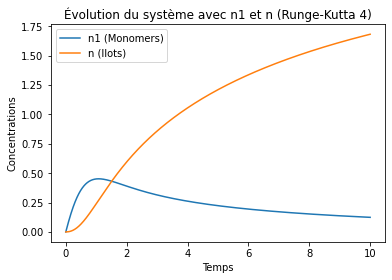

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres ajustables
Fa = 1     # Taux d'ajout d'atomes
Fd = 0   # Taux de mortalité des atomes
D1 = 1   # Taux de liaison des atomes
alpha = 0  # Taux de dépose directe

def rk4_system(f, x0, t_span, num_steps):
    """
    Solve a system of ordinary differential equations using the Runge-Kutta method of order 4.
    """
    t0, tf = t_span
    t_values = np.linspace(t0, tf, num_steps)
    h = t_values[1] - t_values[0]

    solution = np.zeros((num_steps, len(x0)))
    solution[0] = x0

    for i in range(1, num_steps):
        k1 = f(t_values[i-1], solution[i-1])
        k2 = f(t_values[i-1] + h/2, solution[i-1] + h/2 * k1)
        k3 = f(t_values[i-1] + h/2, solution[i-1] + h/2 * k2)
        k4 = f(t_values[i-1] + h, solution[i-1] + h * k3)
        solution[i] = solution[i-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

    return solution, t_values

# Définir le système d'équations différentielles
def system_of_equations(t, x):
    # x[0] = n1, x[1] = n
    dn1dt = Fa - Fd - 2*D1*(x[0]**2) - D1*(x[0] * x[1]) - 2*alpha*Fa*x[0] - alpha*Fa*x[1]
    dndt = D1*(x[0]**2) + alpha*Fa*x[0]
    
    return np.array([dn1dt, dndt])

# Condition initiale et intervalle de temps
initial_condition = [0, 0]  # Conditions initiales de n1 et n
time_span = (0, 10)       # Intervalle de temps
num_steps = 5000           # Nombre de pas de temps

# Résolution du système avec RK4
solution, t_values = rk4_system(system_of_equations, initial_condition, time_span, num_steps)

# Affichage de la solution
plt.plot(t_values, solution[:, 0], label="n1 (Monomers)")
plt.plot(t_values, solution[:, 1], label="n (Ilots)")
plt.xlabel("Temps")
plt.ylabel("Concentrations")
plt.title("Évolution du système avec n1 et n (Runge-Kutta 4)")
plt.legend()
plt.show()


### Implementation avec la RK4 native python

# Monomer and Island Simulation

## Introduction

This project involves simulating the evolution of a system of monomers and islands using different numerical methods to solve a system of differential equations. The model considers parameters for atom addition, mortality, binding, and direct deposition.

## Adjustable Parameters

- **Fa**: Atom addition rate (default: 1)
- **Fd**: Atom mortality rate (default: 0)
- **D1**: Atom binding rate (default: 1)
- **alpha**: Direct deposition rate (default: 0)

## System of Differential Equations

The system of equations is defined by the changes in the number of monomers and islands:

- \( \frac{dn1}{dt} = Fa - Fd - 2D1(n1^2) - D1(n1 \cdot n) - 2\alpha Fa n1 - \alpha Fa n \)
- \( \frac{dn}{dt} = D1(n1^2) + \alpha Fa n1 \)

where:
- \( n1 \) is the number of monomers.
- \( n \) is the number of islands.

## Numerical Methods

Four numerical methods are used to solve the system of equations:

1. **Runge-Kutta Method of Order 4 (RK4)**
2. **RK45 Method (adaptive)**
3. **Explicit Euler Method**
4. **Heun Method (explicit trapezoid)**

### RK4 Method

The RK4 method uses a fourth-order Runge-Kutta scheme to solve the system of equations.

### RK45 Method

The RK45 method employs an adaptive Runge-Kutta scheme for optimal accuracy.

### Euler Method

The Euler method utilizes an explicit approach to solve the system.

### Heun Method

The Heun method is an improved variant of the Euler method using an explicit trapezoidal scheme.


## Visualization

The resulting graph illustrates the concentrations of monomers and islands as a function of time, allowing for a visual assessment of the different methods used.


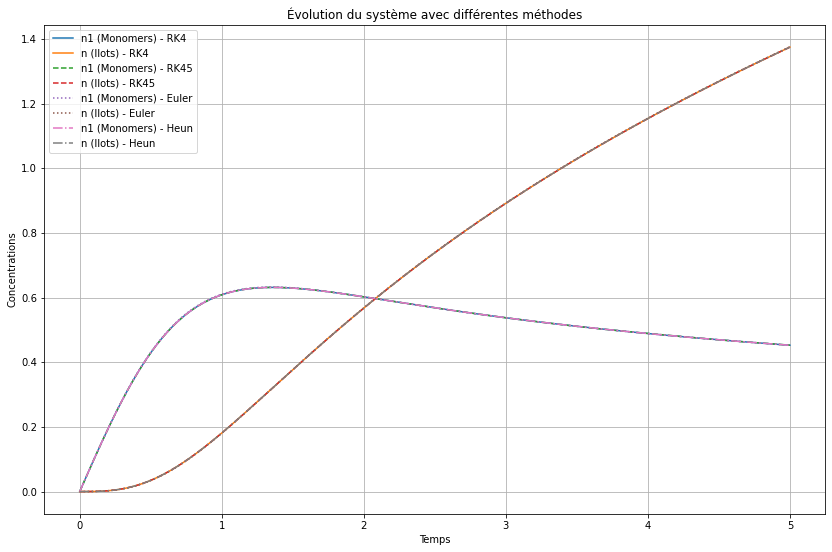

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Paramètres ajustables
Fa = 1     # Taux d'ajout d'atomes
Fd = 0     # Taux de mortalité des atomes
D1 = 1     # Taux de liaison des atomes
alpha = 0  # Taux de dépose directe

# Définir le système d'équations différentielles
def system_of_equations(t, x):
    # x[0] = n1, x[1] = n
    dn1dt = Fa - Fd - 2*D1*(x[0]**2) - D1*(x[0] * x[1]) - 2*alpha*Fa*x[0] - alpha*Fa*x[1]
    dndt = D1*(x[0]**2) + alpha*Fa*x[0]
    
    return np.array([dn1dt, dndt])  # Utiliser np.array au lieu d'une liste


def rk4_system(f, x0, t_span, num_steps):
    """
    Solve a system of ordinary differential equations using the Runge-Kutta method of order 4.
    """
    t0, tf = t_span
    t_values = np.linspace(t0, tf, num_steps)
    h = t_values[1] - t_values[0]

    solution = np.zeros((num_steps, len(x0)))
    solution[0] = x0

    for i in range(1, num_steps):
        k1 = f(t_values[i-1], solution[i-1])
        k2 = f(t_values[i-1] + h/2, solution[i-1] + h/2 * k1)
        k3 = f(t_values[i-1] + h/2, solution[i-1] + h/2 * k2)
        k4 = f(t_values[i-1] + h, solution[i-1] + h * k3)
        solution[i] = solution[i-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

    return solution, t_values

# Résolution du système avec RK45 (solve_ivp)
def rk45_method(f, x0, t_span, num_steps):
    """
    Solve a system of ordinary differential equations using the RK45 method (adaptive).
    """
    t_eval = np.linspace(t_span[0], t_span[1], num_steps)
    solution = solve_ivp(f, t_span, x0, t_eval=t_eval)
    return solution.y.T, solution.t

# Définir la méthode d'Euler explicite
def euler_method(f, x0, t_span, num_steps):
    """
    Solve a system of ordinary differential equations using the Euler method.
    """
    t0, tf = t_span
    t_values = np.linspace(t0, tf, num_steps)
    h = t_values[1] - t_values[0]

    solution = np.zeros((num_steps, len(x0)))
    solution[0] = x0

    for i in range(1, num_steps):
        solution[i] = solution[i-1] + h * f(t_values[i-1], solution[i-1])

    return solution, t_values

# Définir la méthode de Heun (trapèze explicite)
def heun_method(f, x0, t_span, num_steps):
    """
    Solve a system of ordinary differential equations using the Heun method.
    """
    t0, tf = t_span
    t_values = np.linspace(t0, tf, num_steps)
    h = t_values[1] - t_values[0]

    solution = np.zeros((num_steps, len(x0)))
    solution[0] = x0

    for i in range(1, num_steps):
        k1 = f(t_values[i-1], solution[i-1])
        k2 = f(t_values[i-1] + h, solution[i-1] + h * k1)
        solution[i] = solution[i-1] + (h / 2) * (k1 + k2)

    return solution, t_values

# Condition initiale et intervalle de temps
initial_condition = [0, 0]  # Conditions initiales de n1 et n
time_span = (0, 5)         # Intervalle de temps
num_steps = 500             # Nombre de pas de temps

# Résoudre avec chaque méthode
solution_rk4, t_values_rk4 = rk4_system(system_of_equations, initial_condition, time_span, num_steps)
solution_rk45, t_values_rk45 = rk45_method(system_of_equations, initial_condition, time_span, num_steps)
solution_euler, t_values_euler = euler_method(system_of_equations, initial_condition, time_span, num_steps)
solution_heun, t_values_heun = heun_method(system_of_equations, initial_condition, time_span, num_steps)

# Affichage des solutions
plt.figure(figsize=(14, 9))

plt.plot(t_values_rk4, solution_rk4[:, 0], label="n1 (Monomers) - RK4")
plt.plot(t_values_rk4, solution_rk4[:, 1], label="n (Ilots) - RK4")
plt.plot(t_values_rk45, solution_rk45[:, 0], label="n1 (Monomers) - RK45", linestyle='--')
plt.plot(t_values_rk45, solution_rk45[:, 1], label="n (Ilots) - RK45", linestyle='--')
plt.plot(t_values_euler, solution_euler[:, 0], label="n1 (Monomers) - Euler", linestyle=':')
plt.plot(t_values_euler, solution_euler[:, 1], label="n (Ilots) - Euler", linestyle=':')
plt.plot(t_values_heun, solution_heun[:, 0], label="n1 (Monomers) - Heun", linestyle='-.')
plt.plot(t_values_heun, solution_heun[:, 1], label="n (Ilots) - Heun", linestyle='-.')

plt.xlabel("Temps")
plt.ylabel("Concentrations")
plt.title("Évolution du système avec différentes méthodes")
plt.legend()
plt.grid()
plt.show()


# Simulation of Monomer and Island Densities

This Python code simulates the time evolution of monomer and island densities using a system of ordinary differential equations (ODEs). The solution is obtained through the **Runge-Kutta 4th order (RK4)** method, which is used to numerically integrate the ODEs.

## Parameters

- **Fa**: Rate of atom addition to the system.
- **Fd**: Death rate of atoms, simulating their removal.
- **alpha**: Direct deposition rate, affecting how atoms aggregate.
- **D1**: Controls the aggregation of monomers into islands and affects the ratio \( \frac{Fa}{D1} \).
  
The system evolves over time, and the equations account for interactions between monomers and islands, considering both aggregation and removal effects.

## Key Functions

### `rk4_system(f, x0, t_span, num_steps)`
This function solves the system of ODEs using the RK4 method:
- **f**: The system of equations.
- **x0**: Initial conditions.
- **t_span**: Time range for the simulation.
- **num_steps**: Number of steps in the time discretization.

### `system_of_equations(t, x, D1)`
This defines the system of differential equations:
- **x[0]**: Represents the density of monomers.
- **x[1]**: Represents the density of islands.

The system is governed by the interaction between monomers and islands, where the aggregation rate is modulated by \( D1 \).

## Simulation Setup

- **Initial Condition**: Both monomer and island densities start at zero.
- **Time Span**: The simulation runs from \( t=0 \) to \( t=200 \) with 5000 time steps.
- **D1 Values**: The parameter \( D1 \) is varied from 1 to 10 to observe its effect on the density evolution.

## Output

The simulation produces three plots:
1. **Monomer density** over time for different values of \( D1 \).
2. **Island density** over time for different values of \( D1 \).
3. A combined plot showing both monomer and island densities over time.

The results are stored in a dictionary `results` where each key is a value of \( D1 \), and the corresponding time evolution for monomers and islands is saved.

The user can modify `Fa`, `Fd`, `alpha`, and `D1_values` to study the effects of these parameters on the system.


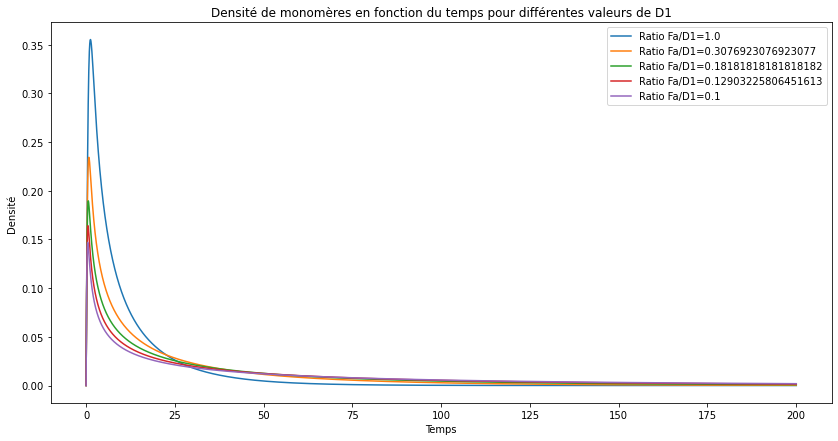

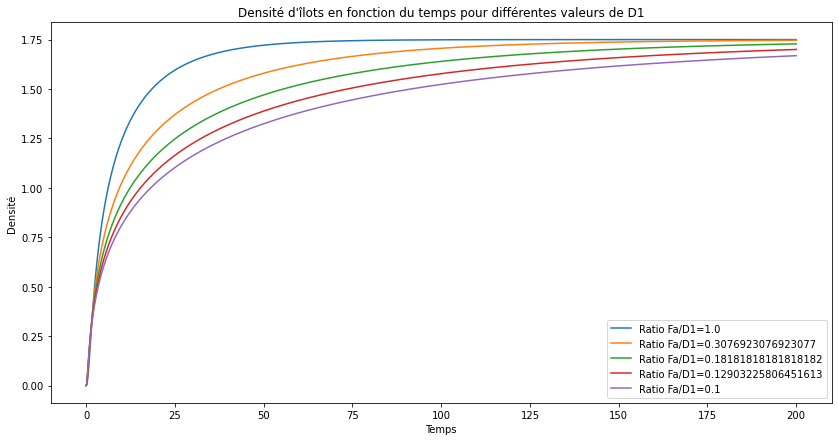

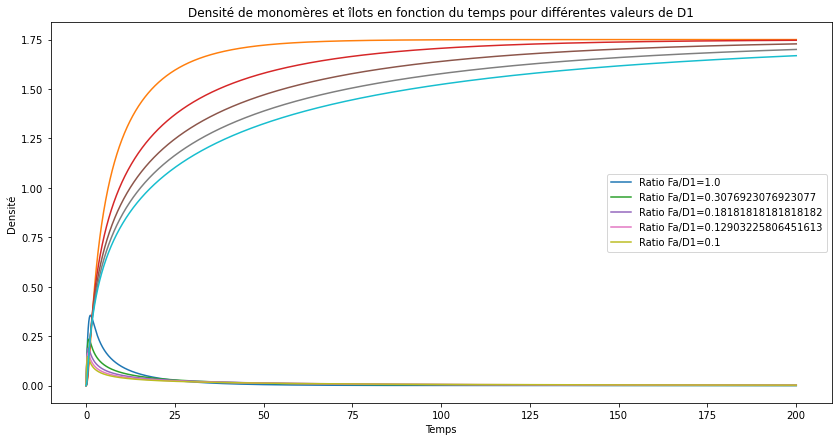

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètre constant
Fa = 1   # Taux d'ajout d'atomes
Fd = 0.3 # Taux de mortalité des atomes
alpha = 0.4  # Taux de dépose directe

def rk4_system(f, x0, t_span, num_steps):
    """
    Solve a system of ordinary differential equations using the Runge-Kutta method of order 4.
    """
    t0, tf = t_span
    t_values = np.linspace(t0, tf, num_steps)
    h = t_values[1] - t_values[0]

    solution = np.zeros((num_steps, len(x0)))
    solution[0] = x0

    for i in range(1, num_steps):
        k1 = f(t_values[i-1], solution[i-1])
        k2 = f(t_values[i-1] + h/2, solution[i-1] + h/2 * k1)
        k3 = f(t_values[i-1] + h/2, solution[i-1] + h/2 * k2)
        k4 = f(t_values[i-1] + h, solution[i-1] + h * k3)
        solution[i] = solution[i-1] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

    return solution, t_values

def system_of_equations(t, x, D1):
    # x[0] = n1, x[1] = n
    dn1dt = Fa - Fd - 2*D1*(x[0]**2) - D1*(x[0] * x[1]) - 2*alpha*Fa*x[0] - alpha*Fa*x[1]
    dndt = D1*(x[0]**2) + alpha*Fa*x[0]
    
    return np.array([dn1dt, dndt])

# Paramètres de simulation
initial_condition = [0, 0]
time_span = (0, 200)  #pour bien voir les courbes avec alpha et Fd =0, time_span=(0,15)
num_steps = 5000

# Valeurs de D1 pour varier le ratio Fa/D1
D1_values = np.linspace(1, 10, 5)  # Valeurs de D1 pour alpha =0 et Fd =0
# Stocker les résultats
results = {D1: {'time': None, 'n1': None, 'n': None} for D1 in D1_values}

for D1 in D1_values:
    # Résolution du système avec chaque valeur de D1
    solution, t_values = rk4_system(lambda t, x: system_of_equations(t, x, D1), initial_condition, time_span, num_steps)
    
    # Stocker les résultats
    results[D1]['time'] = t_values
    results[D1]['n1'] = solution[:, 0]
    results[D1]['n'] = solution[:, 1]


# Tracer les résultats
plt.figure(figsize=(14, 7))
for D1 in D1_values:
    plt.plot(results[D1]['time'], results[D1]['n1'], label=f"Ratio Fa/D1={Fa/D1}")
    #plt.plot(results[D1]['time'], results[D1]['n'], linestyle='--')

plt.xlabel("Temps")
plt.ylabel("Densité")
plt.title("Densité de monomères en fonction du temps pour différentes valeurs de D1")
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))

for D1 in D1_values:
   # plt.plot(results[D1]['time'], results[D1]['n1'], label=f"n1, D1={D1}")
    plt.plot(results[D1]['time'], results[D1]['n'],label=f"Ratio Fa/D1={Fa/D1}")

plt.xlabel("Temps")
plt.ylabel("Densité")
plt.title("Densité d'îlots en fonction du temps pour différentes valeurs de D1")
plt.legend()
plt.show()

plt.figure(figsize=(14, 7))

for D1 in D1_values:
    plt.plot(results[D1]['time'], results[D1]['n1'], label=f"Ratio Fa/D1={Fa/D1}")
    plt.plot(results[D1]['time'], results[D1]['n'])

plt.xlabel("Temps")
plt.ylabel("Densité")
plt.title("Densité de monomères et îlots en fonction du temps pour différentes valeurs de D1")
plt.legend()
plt.show()


# . Task 2


# Initial Approach to System Construction

# System Description and Instructions

To model the system, we decided to represent it using a grid. The grid is displayed to ensure that the monomers, islands, and other functions work as expected. More importantly, this allows us to verify if the monomers and islands behave correctly. Monomers should move in different directions, and upon contact, form an immobile island.

We encourage the reader to experiment with this simulation to visually observe how the system behaves. Recommended parameters for proper visualization are:
- A 20x20 grid
- Any value for `ndiff` (number of monomer jumps before the next one is placed)
- A time step of 1/10 to observe the system's behavior in detail

The simulation offers several boundary condition options:
- **Pacman-style** (periodic boundaries)
- **Bouncing** (reflective walls)
- **Dead wall** (monomers are removed if they move outside the grid)

Additionally, the user can choose between:
- Dropping monomers across the entire grid or within a restricted area, controlled by `grid_x_up`, `grid_x_down`, `grid_y_up`, etc.
- Setting the number of monomers to drop
- Defining the number of simulation steps (note: if the number of steps is too small, an error will appear on the screen)

### Essential Libraries
The code uses several essential libraries:
- `numpy`: for array manipulation and numerical calculations.
- `random`: for generating random positions for the particles.
- `matplotlib.pyplot`: for visualizing the simulation results.
- `time`: to manage and track time-related operations in the simulation.
- `os`: for interacting with the operating system, such as handling file paths or saving outputs.

### Main Functions

1. **`display_grid(grid)`**  
   This function displays the grid and all interactions, allowing for visual analysis of the system behavior.

2. **`drop_bille(grid)`**  
   This function drops a particle at a random position on the grid, ensuring the selected cell is empty.

3. **`move_bille(grid, fixed_grid, x, y)`**  
   This function moves a particle in a random direction, applying periodic boundary conditions. If the particle is part of a cluster, it will not move.

4. **`detect_ilots(grid)`**  
   This function detects and returns all particle clusters on the grid using depth-first search (DFS).

### Running the Simulation
We recommend running the simulation on your machine's terminal. You can expect a visual output similar to the image provided below.


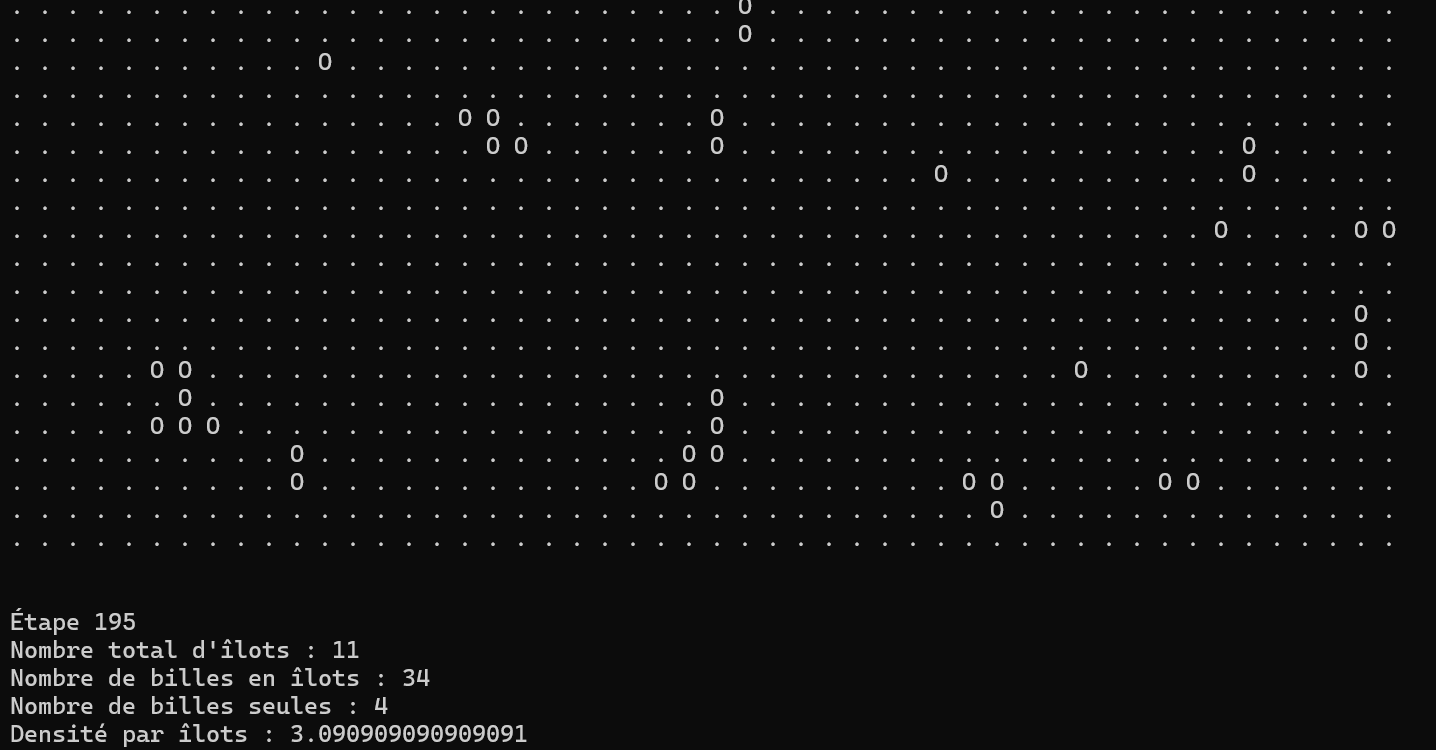


## Code of the initial approach

In [ ]:
import os
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# Parameters
grid_size_x = 50  # Grid size (number of columns)
grid_size_y = 20  # Grid size (number of rows)
grid_size_x_up = 60
grid_size_x_down = 50
grid_size_y_up = 60
grid_size_y_down = 50
num_billes = 100  # Number of monomers to drop
ndiff = 5  # Number of jumps each monomer makes before placing the next one

# Initialize empty grid
grid = np.zeros((grid_size_y, grid_size_x))
fixed_grid = np.zeros((grid_size_y, grid_size_x))  # Grid for fixed monomers (in islands)

# Function to clear the screen
def clear_screen():
    os.system('cls' if os.name == 'nt' else 'clear')

# Function to display the grid
def display_grid(grid):
    clear_screen()  # Clear the screen before displaying
    for row in grid:
        print(" ".join(["O" if cell == 1 else "." for cell in row]))
    print("\n")

# Function to randomly drop a monomer
def drop_bille(grid):
    while True:
        x, y = random.randint(0, grid_size_x - 1), random.randint(0, grid_size_y - 1)
        # x, y = random.randint(grid_size_x_down, grid_size_x_up), random.randint(grid_size_y_down, grid_size_y_up) # To reduce the drop area

        if grid[y, x] == 0:  # Check if the spot is free
            grid[y, x] = 1  # Place a monomer
            break
    return x, y

#-------------------- Pac-Man Version (periodic boundaries) ----------------------
"""
# Function to move a monomer randomly (with periodic boundaries and horizontal bias)
def move_bille(grid, fixed_grid, x, y, bias_horiz=0.95):
    if fixed_grid[y, x] == 1:  # If the monomer is part of an island, it doesn't move
        return x, y
    
    # Create a weighted list of directions with a horizontal bias
    directions = [(0, 1), (0, -1)] * int(bias_horiz * 10) + [(1, 0), (-1, 0)] * int((1 - bias_horiz) * 10)
    direction = random.choice(directions)  # Choose a direction with bias

    # Apply the direction with periodic boundaries
    new_x, new_y = (x + direction[0]) % grid_size_x, (y + direction[1]) % grid_size_y
    
    # Check if the new position is free
    if grid[new_y, new_x] == 0:
        grid[y, x] = 0  # Remove the monomer from the old position
        grid[new_y, new_x] = 1  # Place the monomer in the new position
        return new_x, new_y  # Return the new position
    
    return x, y  # If movement is not possible, return the original position
"""

#-------------------- Bouncing Version (reflective walls) ----------------------
"""
# Function to move a monomer randomly (if it is not fixed)
def move_bille(grid, fixed_grid, x, y):
    if fixed_grid[y, x] == 1:  # If the monomer is part of an island, it doesn't move
        return x, y
    
    direction = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])  # Choose a direction
    new_x, new_y = x + direction[0], y + direction[1]
    
    # Check if the movement is within the grid limits
    if 0 <= new_x < grid_size_x and 0 <= new_y < grid_size_y and grid[new_y, new_x] == 0:
        grid[y, x] = 0  # Remove the monomer from the old position
        grid[new_y, new_x] = 1  # Place the monomer in the new position
        return new_x, new_y  # Return the new position
    
    return x, y  # If movement is not possible, return the original position
"""

#-------------------- Dead Wall Version ----------------------

# Function to move a monomer randomly (with removal if it moves out of bounds)
def move_bille(grid, fixed_grid, x, y):
    if fixed_grid[y, x] == 1:  # If the monomer is part of an island, it doesn't move
        return x, y
    
    direction = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])  # Choose a direction
    new_x, new_y = x + direction[0], y + direction[1]
    
    # Check if the monomer moves out of the grid bounds
    if new_x < 0 or new_x >= grid_size_x or new_y < 0 or new_y >= grid_size_y:
        grid[y, x] = 0  # Remove the monomer from the grid
        return None, None  # Indicate that the monomer was removed
    
    # If movement is within bounds and the cell is free, move the monomer
    if grid[new_y, new_x] == 0:
        grid[y, x] = 0  # Remove the monomer from the old position
        grid[new_y, new_x] = 1  # Place the monomer in the new position
        return new_x, new_y  # Return the new position
    
    return x, y  # If movement is not possible, return the original position

# Function to detect islands
def detect_ilots(grid):
    visited = np.zeros_like(grid)  # Track visited cells
    ilots = []  # List of islands

    def dfs(x, y, current_ilot):
        # Perform Depth-First Search (DFS) to find all adjacent monomers
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        visited[y, x] = 1
        current_ilot.append((x, y))
        
        for direction in directions:
            new_x, new_y = x + direction[0], y + direction[1]
            if 0 <= new_x < grid_size_x and 0 <= new_y < grid_size_y and grid[new_y, new_x] == 1 and not visited[new_y, new_x]:
                dfs(new_x, new_y, current_ilot)

    for i in range(grid_size_y):
        for j in range(grid_size_x):
            if grid[i, j] == 1 and not visited[i, j]:  # Find an unvisited monomer
                current_ilot = []
                dfs(j, i, current_ilot)  # Find all adjacent monomers
                ilots.append(current_ilot)

    return ilots

# Simulation loop
step = []
for i in range(2500):
    step.append(i)

# Lists to store the results
billes_positions = []  # Positions of monomers
densi_ilot_list = []  # Density of islands
nombre_ilots_list = []  # Number of islands
billes_seules_list = []  # Number of single monomers

# Variable to track the number of dropped monomers
billes_deposees = 0

# Main simulation
for bille_index in step:
    if np.max(step) < num_billes * ndiff:
        print(f"")
        print(f"------------- ERROR -------------")
        print(f"")
        print(f"-----> The step count is not large enough to account for all monomer drops. Please select a number larger than {num_billes * ndiff}.")
        print(f"")
        break

    # If not all monomers have been dropped
    if billes_deposees < num_billes and bille_index % ndiff == 0:
        # Drop a new monomer
        x, y = drop_bille(grid)
        billes_positions.append((x, y))
        billes_deposees += 1
    
    # Move each monomer
    for position in billes_positions:
        if position is not None:
            x, y = position
            new_x, new_y = move_bille(grid, fixed_grid, x, y)
            
            if new_x is None and new_y is None:  # If the monomer was removed
                billes_positions.remove(position)

    # Detect islands and calculate stats
    ilots = detect_ilots(grid)
    nombre_ilots_list.append(len(ilots))
    billes_seules_list.append(len([ilot for ilot in ilots if len(ilot) == 1]))
    densi_ilot_list.append(np.mean([len(ilot) for ilot in ilots]) if ilots else 0)

    # Display the grid and results
    display_grid(grid)

# Print the results
print(f"Number of islands: {nombre_ilots_list[-1]}")
print(f"Number of single monomers: {billes_seules_list[-1]}")
print(f"Density of islands: {densi_ilot_list[-1]}")


# MC approach of the simulation

## System Description

This code represents an advanced implementation of a simulation designed to study the aggregation behavior of monomers on a grid. By employing a Monte Carlo approach, we run multiple simulations to calculate and plot the average results, providing a statistical perspective on the system's dynamics. This enhanced approach allows us to explore how monomers and clusters (islands) behave under varying conditions.

### Key Features
- **Monte Carlo Simulation**: The code runs multiple trials to ensure robust statistical outcomes.
- **Bias Introduction**: A directional bias is implemented to enable a more diverse numerical experience, simulating more complex interactions.
- **Randomized Testing**: The code randomly selects different `ndiff` values within a specified range to evaluate their effects systematically. For our experiments, we compute 10 simulations using 10 distinct `ndiff` values.

### Boundary Conditions
Users can select from several boundary conditions:
- **Pacman-style**: Periodic boundaries allowing particles to wrap around the grid.
- **Bouncing**: Reflective walls where particles bounce back upon hitting the grid's edges.
- **Dead Wall**: Monomers are removed from the grid if they exceed the defined boundaries.

### User Configuration Options
The simulation allows customization through the following parameters:
- **Monomer Dropping Area**: Choose to drop monomers across the entire grid or within a defined restricted area (controlled by parameters such as `grid_x_up`, `grid_x_down`, `grid_y_up`, etc.).
- **Monomer Count**: Specify the total number of monomers to deposit.
- **Simulation Steps**: Define the number of simulation steps. An error will be raised if the specified number of steps is insufficient.

### Essential Libraries
This code utilizes several libraries crucial for its operation:
- `numpy`: For efficient array manipulation and numerical calculations.
- `random`: For generating random positions of the particles.
- `matplotlib.pyplot`: For visualizing simulation results.
- `time`: To manage timing operations within the simulation.
- `os`: For interacting with the operating system, including file path management and output saving.

## Main Functions

1. **`save_final_grid(grid, step_num, filename)`**  
   Saves the final state of the simulation grid as a PNG image, facilitating visual analysis of monomer distribution.

2. **`drop_bille(grid)`**  
   Deposits a monomer at a randomly selected empty position on the grid.

3. **`move_bille(grid, fixed_grid, x, y, bias_horiz=0.5)`**  
   Moves a monomer in a random direction while applying periodic boundary conditions. Monomers that belong to a cluster do not move. The function includes a bias parameter to favor specific movement directions.

4. **`detect_ilots(grid)`**  
   Identifies and returns clusters of monomers on the grid using a depth-first search (DFS) algorithm.

5. **`run_simulation(ndiff)`**  
   Runs the monomer aggregation simulation for a specified number of steps, managing the initialization of the grid, the addition of monomers, their movement, the formation of clusters, and the counting of clusters at each step.

---

## Running the Simulation
To execute the simulation, we recommend running the code via your terminal.


# Code for the MC approach

In [ ]:
import os
import numpy as np
import random
import time
import matplotlib.pyplot as plt

# Paramètres
grid_size_x = 10  # Taille de la grille (nombre de colonnes)
grid_size_y = 10  # Taille de la grille (nombre de lignes)
grid_size_x_up = 75
grid_size_x_down = 25
grid_size_y_up = 75
grid_size_y_down = 25
num_billes = 300  # Nombre de billes à déposer
billes_mortes = 0

# Initialiser la grille vide
grid = np.zeros((grid_size_y, grid_size_x))
fixed_grid = np.zeros((grid_size_y, grid_size_x))  # Grille des billes fixées

# Fonction pour effacer l'écran (clear)
def clear_screen():
    os.system('cls' if os.name == 'nt' else 'clear')

# Fonction pour afficher la grille
def display_grid(grid):
    clear_screen()  # Effacer l'écran avant l'affichage
    for row in grid:
        print(" ".join(["O" if cell == 1 else "." for cell in row]))
    print("\n")

# Fonction pour déposer une bille aléatoirement
def drop_bille(grid):
    for _ in range(100):  # Limiter le nombre d'essais
        x, y = random.randint(0, grid_size_x - 1), random.randint(0, grid_size_y - 1)
        #x, y = random.randint(grid_size_x_down, grid_size_x_up), random.randint(grid_size_y_down, grid_size_y_up)

        if grid[y, x] == 0:  # Vérifier que la case est libre
            grid[y, x] = 1  # Déposer une bille
            return x, y
    return None  # Si la grille est pleine

#-------------------- Version pour que les bords rebondissent ----------------------

# Fonction pour déplacer une bille aléatoirement (si elle n'est pas fixée)
def move_bille(grid, fixed_grid, x, y, bias_horiz=0.95):
    if fixed_grid[y, x] == 1:  # Si la bille fait partie d'un îlot, elle ne bouge pas
        return x, y
    
    directions = [(0, 1), (0, -1)] * int(bias_horiz * 10) + [(1, 0), (-1, 0)] * int((1 - bias_horiz) * 10)
    direction = random.choice(directions)  # Choisir une direction avec un biais

    new_x, new_y = (x + direction[0]) % grid_size_x, (y + direction[1]) % grid_size_y
    
    # Vérifier que le nouveau mouvement est dans les limites de la grille
    if 0 <= new_x < grid_size_x and 0 <= new_y < grid_size_y and grid[new_y, new_x] == 0:
        grid[y, x] = 0  # Retirer la bille de l'ancienne position
        grid[new_y, new_x] = 1  # Placer la bille à la nouvelle position
        return new_x, new_y  # Retourner la nouvelle position
    
    return x, y  # Si le déplacement est impossible, retourner la position originale


"""
#-------------------- Pac-Man Version (periodic boundaries) ----------------------

# Fonction pour déplacer une bille aléatoirement (avec bords périodiques et biais de direction)
def move_bille(grid, fixed_grid, x, y, bias_horiz=0.95):
    if fixed_grid[y, x] == 1:  # Si la bille fait partie d'un îlot, elle ne bouge pas
        return x, y
    
    directions = [(0, 1), (0, -1)] * int(bias_horiz * 10) + [(1, 0), (-1, 0)] * int((1 - bias_horiz) * 10)
    direction = random.choice(directions)  # Choisir une direction avec un biais

    new_x, new_y = (x + direction[0]) % grid_size_x, (y + direction[1]) % grid_size_y
    
    if grid[new_y, new_x] == 0:
        grid[y, x] = 0  # Retirer la bille de l'ancienne position
        grid[new_y, new_x] = 1  # Placer la bille à la nouvelle position
        return new_x, new_y  # Retourner la nouvelle position
    
    return x, y  # Si le déplacement est impossible, retourner la position originale

"""
#-------------------- Bouncing Version (reflective walls) ----------------------

# Fonction pour déplacer une bille aléatoirement (si elle n'est pas fixée)
def move_bille(grid, fixed_grid, x, y, bias_horiz=0.95):
    if fixed_grid[y, x] == 1:  # Si la bille fait partie d'un îlot, elle ne bouge pas
        return x, y
    
    directions = [(0, 1), (0, -1)] * int(bias_horiz * 10) + [(1, 0), (-1, 0)] * int((1 - bias_horiz) * 10)
    direction = random.choice(directions)  # Choisir une direction avec un biais

    new_x, new_y = (x + direction[0]) % grid_size_x, (y + direction[1]) % grid_size_y
    
    # Vérifier que le nouveau mouvement est dans les limites de la grille
    if 0 <= new_x < grid_size_x and 0 <= new_y < grid_size_y and grid[new_y, new_x] == 0:
        grid[y, x] = 0  # Retirer la bille de l'ancienne position
        grid[new_y, new_x] = 1  # Placer la bille à la nouvelle position
        return new_x, new_y  # Retourner la nouvelle position
    
    return x, y  # Si le déplacement est impossible, retourner la position originale
"""
#-------------------- Dead Wall Version ----------------------


# Fonction pour déplacer une bille aléatoirement (avec suppression si elle sort des bords)
def move_bille(grid, fixed_grid, x, y, bias_horiz = 0.5):
    global billes_mortes
    if fixed_grid[y, x] == 1:  # Si la bille fait partie d'un îlot, elle ne bouge pas
        return x, y

    directions = [(0, 1), (0, -1)] * int(bias_horiz * 10) + [(1, 0), (-1, 0)] * int((1 - bias_horiz) * 10)
    direction = random.choice(directions)  # Choisir une direction avec un biais

    new_x, new_y = (x + direction[0]) % grid_size_x, (y + direction[1]) % grid_size_y

    # Vérifier si la bille sort des limites de la grille
    if new_x < 0 or new_x >= grid_size_x or new_y < 0 or new_y >= grid_size_y:
        grid[y, x] = 0  # Supprimer la bille de la grille
        billes_mortes += 1  # Incrémenter le compteur de billes mortes
        return None, None  # Indiquer que la bille est supprimée

    # Si le mouvement est dans les limites et la case est libre, déplacer la bille
    if grid[new_y, new_x] == 0:
        grid[y, x] = 0  # Retirer la bille de l'ancienne position
        grid[new_y, new_x] = 1  # Placer la bille à la nouvelle position
        return new_x, new_y  # Retourner la nouvelle position

    return x, y  # Si le déplacement est impossible, retourner la position originale
"""

# Fonction pour détecter les îlots
def detect_ilots(grid):
    visited = np.zeros_like(grid)
    ilots = []

    def dfs(x, y, current_ilot):
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        visited[y, x] = 1
        current_ilot.append((x, y))
        
        for direction in directions:
            new_x, new_y = x + direction[0], y + direction[1]
            if 0 <= new_x < grid_size_x and 0 <= new_y < grid_size_y and grid[new_y, new_x] == 1 and not visited[new_y, new_x]:
                dfs(new_x, new_y, current_ilot)

    for i in range(grid_size_y):
        for j in range(grid_size_x):
            if grid[i, j] == 1 and not visited[i, j]:
                current_ilot = []
                dfs(j, i, current_ilot)
                ilots.append(current_ilot)

    return ilots

# Fonction de simulation
def run_simulation(ndiff):
    global grid, fixed_grid
    grid = np.zeros((grid_size_y, grid_size_x))
    fixed_grid = np.zeros((grid_size_y, grid_size_x))

    billes_positions = []
    densi_ilot_list = []
    nombre_ilots_list = []
    billes_seules_list = []
    billes_deposees = 0

    for bille_index in range(num_billes * ndiff):
        if billes_deposees < num_billes and bille_index % ndiff == 0:
            position = drop_bille(grid)
            if position:  # Si une bille a été déposée
                billes_positions.append(position)
                billes_deposees += 1

        for i in range(len(billes_positions)):
            x, y = billes_positions[i]
            x, y = move_bille(grid, fixed_grid, x, y)
            billes_positions[i] = (x, y)

        ilots = detect_ilots(grid)

        billes_seules = sum(1 for ilot in ilots if len(ilot) == 1)
        billes_en_ilots = sum(len(ilot) for ilot in ilots if len(ilot) > 1)
        nombre_ilots = len([ilot for ilot in ilots if len(ilot) > 1])

        # Marquer les billes dans les îlots comme fixées
        for ilot in ilots:
            if len(ilot) > 1:
                for (x, y) in ilot:
                    fixed_grid[y, x] = 1

        densite_actuelle = billes_en_ilots / nombre_ilots if nombre_ilots > 0 else 0
        densi_ilot_list.append(densite_actuelle)
        nombre_ilots_list.append(nombre_ilots)
        billes_seules_list.append(billes_seules)

        surface_ilots = billes_en_ilots
        surface_totale = grid_size_x * grid_size_y
        proportion_couverte = surface_ilots / surface_totale

        if proportion_couverte >= 0.2:
            print(f"Simulation arrêtée : les îlots couvrent {proportion_couverte * 100:.2f}% de la surface.")
            break

    return densi_ilot_list, nombre_ilots_list, billes_seules_list

# Boucle MCMC
ndiff_values = sorted(random.sample(range(1, 30), 10)) # Valeurs à tester pour ndiff
results = {}

for sauts in ndiff_values:
    print(f"Running simulation for sauts_par_bille = {sauts}")
    results[sauts] = run_simulation(sauts)


# Initialisation des listes pour stocker les résultats moyens
avg_densi_ilot = []
avg_nombre_ilots = []
avg_billes_seules = []
max_steps = 0  # Nombre maximal d'étapes atteint dans les simulations

# Calculer la moyenne des résultats pour chaque étape
for sauts, (densi_ilot_list, nombre_ilots_list, billes_seules_list) in results.items():
    # Met à jour le nombre maximum d'étapes si nécessaire
    max_steps = max(max_steps, len(densi_ilot_list))

# Initialiser les listes avec des zéros pour les moyennes
avg_densi_ilot = np.zeros(max_steps)
avg_nombre_ilots = np.zeros(max_steps)
avg_billes_seules = np.zeros(max_steps)
count_steps = np.zeros(max_steps)  # Pour gérer les cas où certaines simulations s'arrêtent plus tôt

# Additionner les résultats de chaque simulation
for sauts, (densi_ilot_list, nombre_ilots_list, billes_seules_list) in results.items():
    for i in range(len(densi_ilot_list)):
        avg_densi_ilot[i] += densi_ilot_list[i]
        avg_nombre_ilots[i] += nombre_ilots_list[i]
        avg_billes_seules[i] += billes_seules_list[i]
        count_steps[i] += 1

# Calculer les moyennes
avg_densi_ilot /= np.maximum(count_steps, 1)  # Évite la division par zéro
avg_nombre_ilots /= np.maximum(count_steps, 1)
avg_billes_seules /= np.maximum(count_steps, 1)

# Tracer la densité des îlots
for sauts, (densi_ilot_list, _, _) in results.items():
    plt.plot(densi_ilot_list, label=f'Densité des îlots (sauts = {sauts})')
plt.plot(avg_densi_ilot, '--', color='black', label='Moyenne des densités')  # Ligne moyenne en style '--'
plt.xlabel('Étapes')
plt.ylabel('Densité des îlots')
plt.title('Densité des îlots en fonction des étapes')
#plt.legend()
plt.show()

# Tracer le nombre d'îlots
for sauts, (_, nombre_ilots_list, _) in results.items():
    plt.plot(nombre_ilots_list, label=f'Nombre d\'îlots (sauts = {sauts})')
plt.plot(avg_nombre_ilots, '--', color='black', label='Moyenne des îlots')  # Ligne moyenne en style '--'
plt.xlabel('Étapes')
plt.ylabel('Nombre d\'îlots')
plt.title('Nombre d\'îlots en fonction des étapes')
#plt.legend()
plt.show()

# Tracer le nombre de billes seules
for sauts, (_, _, billes_seules_list) in results.items():
    plt.plot(billes_seules_list, label=f'Billes seules (sauts = {sauts})')
plt.plot(avg_billes_seules, '--', color='black', label='Moyenne des billes seules')  # Ligne moyenne en style '--'
plt.xlabel('Étapes')
plt.ylabel('Nombre de billes seules')
plt.title('Billes seules en fonction des étapes')
#plt.legend()
plt.show()


## Code for the linear correlation between D1 and Ndiff

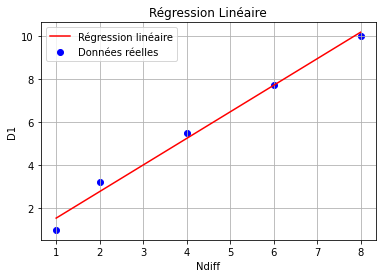

Coefficient (pente): 1.2347560975609757
Ordonnée à l'origine (intercept): 0.3140243902439018


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Exemple de données (à remplacer par vos propres données)
# Ndiff : valeurs indépendantes
# D1 : valeurs dépendantes
D1 = np.array([1, 3.25, 5.5, 7.75, 10])
Ndiff = np.array([1, 2, 4, 6, 8])

# Calcul des coefficients de la régression linéaire
n = len(Ndiff)
m = (n * np.dot(Ndiff, D1) - np.sum(Ndiff) * np.sum(D1)) / (n * np.dot(Ndiff, Ndiff) - np.sum(Ndiff)**2)
b = (np.sum(D1) - m * np.sum(Ndiff)) / n

# Calcul des valeurs prédites
D1_pred = m * Ndiff + b

# Affichage des résultats
plt.scatter(Ndiff, D1, color='blue', label='Données réelles')
plt.plot(Ndiff, D1_pred, color='red', label='Régression linéaire')
plt.xlabel('Ndiff')
plt.ylabel('D1')
plt.title('Régression Linéaire')
plt.legend()
plt.grid()
plt.show()

# Affichage des coefficients
print(f"Coefficient (pente): {m}")
print(f"Ordonnée à l'origine (intercept): {b}")


# Task 3.

# Theoritical / numerical solving of the new equations

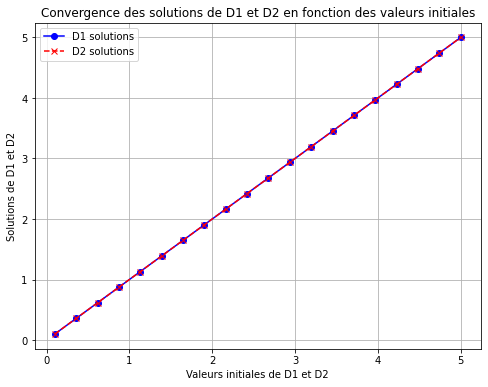

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Densités des monomères des deux espèces
n1 = 0.5  # Densité de l'espèce 1 voulue
n2 = 0.5  # Densité de l'espèce 2 voulue

# Fonction représentant les deux équations à résoudre
def equations(vars):
    D1, D2 = vars
    eq1 = D1 * (n1**2 + n1 * n2) - D2 * (n2**2 + n1 * n2)
    eq2 = D1 - D2  # On suppose que D1 = D2 pour une répartition homogène
    return [eq1, eq2]

# Listes pour stocker les résultats de D1 et D2
D1_solutions = []
D2_solutions = []

# Test de plusieurs valeurs initiales pour D1 et D2
initial_guesses = np.linspace(0.1, 5.0, 20)  # 20 valeurs initiales comprises entre 0.1 et 2.0

for guess in initial_guesses:
    initial_guess = [guess, guess]
    D1_D2_solution = fsolve(equations, initial_guess)
    D1_solutions.append(D1_D2_solution[0])
    D2_solutions.append(D1_D2_solution[1])

# Tracer les résultats
plt.figure(figsize=(8, 6))
plt.plot(initial_guesses, D1_solutions, 'b-', label="D1 solutions", marker='o')
plt.plot(initial_guesses, D2_solutions, 'r--', label="D2 solutions", marker='x')
plt.xlabel("Valeurs initiales de D1 et D2")
plt.ylabel("Solutions de D1 et D2")
plt.title("Convergence des solutions de D1 et D2 en fonction des valeurs initiales")
plt.legend()
plt.grid(True)
plt.show()


# MCMC approach

## System Description

This code presents an advanced implementation of a simulation designed to study the aggregation behavior of monomers on a grid. Specifically, it utilizes a Monte Carlo Markov Chain (MCMC) approach to investigate the relationship between two species of monomers, each with distinct diffusion characteristics (`ndiff`). The primary objective is to determine the ratio of these diffusion rates at which the total proportion of islands is composed of 50% of one species and 50% of the other. For a detailed discussion of the MCMC development, please refer to the accompanying report. This enhanced approach allows exploration of the parameter space concerning `ndiff` and how clusters (or islands) can achieve a desired percentage of each species.

The simulation employs the same Monte Carlo approach as previous versions but now integrates a pseudo-likelihood method (see the report for further details).

### Boundary Conditions

The simulation operates under the following boundary condition:

- **Pacman-style**: Periodic boundaries that allow particles to wrap around the grid.

### User Configuration Options

The simulation permits customization through several parameters:

- **Monomer Count**: Specify the total number of monomers to deposit (`num_billes`).
- **Simulation Steps**: Define the number of simulation steps. An error will be raised if the specified number of steps is insufficient.
- **Ndiff of the First Species**: The diffusion rate for the first species, which can be adjusted based on experimental conditions.

### Essential Libraries

This code utilizes several libraries that are crucial for its operation:

- `numpy`: For efficient array manipulation and numerical calculations.
- `random`: For generating random positions of the particles.
- `matplotlib.pyplot`: For visualizing simulation results.
- `math`: Provides mathematical functions for calculations.
- `os`: For interacting with the operating system, including file path management and output saving.

## Main Functions

1. **`save_final_grid(grid, step_num, filename)`**  
   Saves the final state of the simulation grid as a PNG image, facilitating visual analysis of monomer distribution.

2. **`drop_bille(grid, espece)`**  
   Deposits a monomer of the specified species (`espece`) at a randomly selected empty position on the grid.

3. **`move_bille(grid, fixed_grid, x, y, espece, bias_horiz=0.5)`**  
   Moves a monomer in a random direction while applying periodic boundary conditions. Monomers that belong to a cluster (island) do not move. The function includes a bias parameter to favor specific movement directions.

4. **`detect_ilots(grid)`**  
   Identifies and returns clusters of monomers on the grid using a depth-first search (DFS) algorithm, only retaining clusters larger than one monomer.

5. **`run_simulation(ndiff_b)`**  
   Executes the monomer aggregation simulation for a specified number of steps, managing the initialization of the grid, the addition of monomers, their movement, the formation of clusters, and the counting of clusters at each step.

6. **`calculate_density_percentage(ilots, grid)`**  
   Computes the average percentage of each species within the identified islands.

7. **`pseudo_likelihood(percentage_espece_1, percentage_espece_2, beta=1)`**  
   Calculates a pseudo-likelihood value based on the absolute difference between the percentages of the two species, with lower differences yielding higher likelihood values.

8. **`mcmc_optimization(initial_sauts, num_iterations=100, beta=1)`**  
   Implements the MCMC optimization process, evaluating different jump values (`sauts`) to achieve a balanced species distribution within the islands.

## Running the Simulation

To execute the simulation, it is recommended to run the code via your terminal. Ensure that all necessary libraries are installed and configure the parameters as desired before initiating the simulation.


# Code for the MCMC approach

In [ ]:
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import math 


# Les paramètres de la simulation
grid_size_x, grid_size_y = 40, 40
num_billes = 3000
ndiff_a = 40  # Nombre de sauts pour l'espèce 1
ndiff_b = random.randint(1, 100)  # Valeur initiale de saut pour l'espèce 2

# Initialiser la grille vide
grid = np.zeros((grid_size_y, grid_size_x))
fixed_grid = np.zeros((grid_size_y, grid_size_x))  # Grille des billes fixées

# Fonction pour effacer l'écran (clear)
def clear_screen():
    os.system('cls' if os.name == 'nt' else 'clear')

# Fonction pour déposer une bille aléatoirement
def drop_bille(grid, espece):
    while True:
        x, y = random.randint(0, grid_size_x - 1), random.randint(0, grid_size_y - 1)
        if grid[y, x] == 0:  # Vérifier que la case est libre
            grid[y, x] = espece  # Déposer la bille selon son espèce
            break
    return x, y

# Fonction pour déplacer une bille aléatoirement (avec bords périodiques et biais de direction)
def move_bille(grid, fixed_grid, x, y, espece, bias_horiz=0.5):
    if fixed_grid[y, x] == 1:  # Si la bille fait partie d'un îlot, elle ne bouge pas
        return x, y

    # Créer une liste pondérée des directions avec un biais horizontal
    directions = [(0, 1), (0, -1)] * int(bias_horiz * 10) + [(1, 0), (-1, 0)] * int((1 - bias_horiz) * 10)
    direction = random.choice(directions)  # Choisir une direction

    # Appliquer la direction avec bords périodiques
    new_x, new_y = (x + direction[0]) % grid_size_x, (y + direction[1]) % grid_size_y
    
    # Vérifier que la nouvelle position est libre
    if grid[new_y, new_x] == 0:
        grid[y, x] = 0  # Retirer la bille de l'ancienne position
        grid[new_y, new_x] = espece  # Placer la bille à la nouvelle position
        return new_x, new_y

    return x, y

# Fonction pour détecter les îlots
def detect_ilots(grid):
    visited = np.zeros_like(grid)  # Garde une trace des cases déjà visitées
    ilots = []

    def dfs(x, y, current_ilot):
        directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
        visited[y, x] = 1
        current_ilot.append((x, y))

        for direction in directions:
            new_x, new_y = x + direction[0], y + direction[1]
            if 0 <= new_x < grid_size_x and 0 <= new_y < grid_size_y and grid[new_y, new_x] > 0 and not visited[new_y, new_x]:
                dfs(new_x, new_y, current_ilot)

    for i in range(grid_size_y):
        for j in range(grid_size_x):
            if grid[i, j] > 0 and not visited[i, j]:
                current_ilot = []
                dfs(j, i, current_ilot)
                if len(current_ilot) > 1:  # Ne conserver que les îlots de plus d'un monomère
                    ilots.append(current_ilot)

    return ilots

# Fonction pour afficher uniquement les îlots sur la grille
def display_ilots(grid, ilots):
    # Créer une grille vide pour visualiser uniquement les îlots
    ilot_grid = np.zeros_like(grid)

    # Remplir la grille des îlots
    for ilot in ilots:
        for (x, y) in ilot:
            ilot_grid[y, x] = grid[y, x]  # Garder les espèces telles qu'elles sont

    # Afficher la grille des îlots avec matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(ilot_grid, cmap='viridis', origin='upper')
    plt.title("Répartition des îlots (espèces 1 et 2)")
    plt.colorbar(label="Espèce")
    plt.show()

# Fonction pour calculer le pourcentage moyen de chaque espèce dans les îlots
def calculate_density_percentage(ilots, grid):
    total_espece_1, total_espece_2 = 0, 0
    total_monomers = 0
    
    for ilot in ilots:
        espece_1_count = sum(1 for (x, y) in ilot if grid[y, x] == 1)
        espece_2_count = sum(1 for (x, y) in ilot if grid[y, x] == 2)
        total_size = len(ilot)
        total_espece_1 += espece_1_count
        total_espece_2 += espece_2_count
        total_monomers += total_size
    
    if total_monomers > 0:
        percentage_espece_1 = (total_espece_1 / total_monomers) * 100
        percentage_espece_2 = (total_espece_2 / total_monomers) * 100
    else:
        percentage_espece_1 = percentage_espece_2 = 0
    
    return percentage_espece_1, percentage_espece_2

# Fonction de simulation principale
def run_simulation(ndiff_b):
    global grid, fixed_grid
    grid = np.zeros((grid_size_y, grid_size_x))
    fixed_grid = np.zeros((grid_size_y, grid_size_x))

    billes_positions_1 = []
    billes_positions_2 = []
    billes_deposees = 0
    step = range(25000)  # Nombre d'étapes de la simulation

    # Simulation
    for bille_index in step:
        if billes_deposees < num_billes and bille_index % ndiff_a == 0:
            x, y = drop_bille(grid, espece=1)
            billes_positions_1.append((x, y, 1))
            billes_deposees += 1

        if billes_deposees < num_billes and bille_index % ndiff_b == 0:
            x, y = drop_bille(grid, espece=2)
            billes_positions_2.append((x, y, 2))
            billes_deposees += 1

        # Déplacer les billes existantes
        for i in range(len(billes_positions_1)):
            x, y, espece = billes_positions_1[i]
            x, y = move_bille(grid, fixed_grid, x, y, espece=1)
            billes_positions_1[i] = (x, y, espece)

        for i in range(len(billes_positions_2)):
            x, y, espece = billes_positions_2[i]
            x, y = move_bille(grid, fixed_grid, x, y, espece=2)
            billes_positions_2[i] = (x, y, espece)

        # Détecter les îlots après chaque étape
        ilots = detect_ilots(grid)
        percentage_espece_1, percentage_espece_2 = calculate_density_percentage(ilots, grid)
        
        # Arrêter la simulation si la couverture atteint 20 %
        surface_ilots = sum([len(ilot) for ilot in ilots])
        surface_totale = grid_size_x * grid_size_y
        proportion_couverte = surface_ilots / surface_totale
        if proportion_couverte >= 0.2:
            print(f"STOP - Les îlots recouvrent 20% de la surface total")
            break

    return percentage_espece_1, percentage_espece_2

def pseudo_likelihood(percentage_espece_1, percentage_espece_2, beta=1):
    # Calculer la différence absolue entre les pourcentages
    difference = abs(percentage_espece_1 - percentage_espece_2)
    
    # La pseudo-likelihood favorise une différence faible
    pseudo = math.exp(-beta * difference)
    return pseudo

accepted_sauts = []
rejected_sauts = []

def mcmc_optimization(initial_sauts, num_iterations=100, beta=1):
    global accepted_sauts, rejected_sauts
    current_sauts = initial_sauts
    percentage_espece_1, percentage_espece_2 = run_simulation(current_sauts)
    current_likelihood = pseudo_likelihood(percentage_espece_1, percentage_espece_2, beta)
    for iteration in range(num_iterations):
        # Calculer la pseudo-vraisemblance avec les valeurs actuelles
        #current_likelihood = pseudo_likelihood(percentage_espece_1, percentage_espece_2, beta)
        
        # Vérifier si la pseudo-vraisemblance est inférieure à 0.4
        if current_likelihood < 0.02:
            new_sauts = random.randint(1, 100)
            print(f"saut uni")
        else:
            proba = np.random.uniform(0, 1)
            if proba < 0.7:
                new_sauts = current_sauts + random.randint(0, 2)
                print(f"petit saut")
            else:
                new_sauts = current_sauts + random.randint(2, 5)  
                print(f"grand saut")
        #new_sauts = max(1, min(new_sauts, 100))
            
        if new_sauts < 1:
            print("Valeur de saut invalide, réinitialisation à 1.")
            new_sauts = 5
        elif new_sauts > 100:  # Si tu as un maximum fixé
            print("Valeur de saut trop élevée, réinitialisation à 100.")
            new_sauts = 95

        
        percentage_espece_1_new, percentage_espece_2_new = run_simulation(new_sauts)
        new_likelihood = pseudo_likelihood(percentage_espece_1_new, percentage_espece_2_new, beta)

        # Acceptation ou rejet
        if new_likelihood > current_likelihood or random.uniform(0, 1) < (new_likelihood / current_likelihood):
            accepted_sauts.append(new_sauts)
            current_sauts = new_sauts
            current_likelihood = new_likelihood
            print(f"Iteration {iteration + 1}: Accepté - {current_sauts} avec vraisemblance {current_likelihood:.4f}")
            #print(f"proba = {proba}")
        else:
            rejected_sauts.append(new_sauts)
            print(f"Iteration {iteration + 1}: Rejeté - {new_sauts} avec vraisemblance {current_likelihood:.4f}")
            #print(f"proba = {proba}")
    return current_sauts

# Lancer l'optimisation MCMC
final_ndiff_b = mcmc_optimization(ndiff_b)

# Afficher les résultats
print(f"\nValeur finale optimisée de ndiff_b: {final_ndiff_b}")
# Lancer une simulation finale avec la valeur optimisée
print("\nExécution de la simulation finale avec la valeur optimisée...")
percentage_espece_1_final, percentage_espece_2_final = run_simulation(final_ndiff_b)

# Supposons que accepted_sauts soit déjà défini dans ton code
valeur_optimisee = final_ndiff_b

# Sauvegarder l'image des îlots finaux
plt.figure(figsize=(8, 8))
plt.imshow(grid, cmap='viridis', origin='upper')
plt.title(f"Répartition finale des îlots avec final_ndiff_b = {final_ndiff_b}")
plt.colorbar(label="Espèce")
plt.savefig('resultat_final_ilots.png')
plt.show()

print("Simulation finale effectuée et image sauvegardée sous 'resultat_final_ilots.png'")

# Tracer l'histogramme des sauts acceptés et rejetés
plt.figure(figsize=(8, 8))
plt.hist(accepted_sauts, bins=30, alpha=0.5, color='blue', density=True, label='Histogramme des sauts acceptés')
plt.title("Histogramme des sauts acceptés")
plt.xlabel("Valeurs de final_ndiff_b")
plt.ylabel("Fréquence")
plt.legend()
plt.grid()
plt.show()
